# What is **Content-Based Filtering**?

Content-based filtering recommends items to a user based on the **similarity between item features** and the **user’s profile**. Each user and each item is represented by a feature vector (e.g., demographics, genres, keywords), and recommendations are generated by learning which types of items each user prefers.


### Examples of users/items features

#### 🎬 Movie Recommendation

| User Features                    | Item (Movie) Features                         |
|----------------------------------|-----------------------------------------------|
| Age                              | Genre (Action, Romance, Sci-Fi, etc.)         |
| Gender                           | Director                                      |
| Preferred genres                 | Cast/Actors                                   |
| Favorite actors/directors        | Release year                                  |
| Average rating given by user     | Plot summary (converted to TF-IDF or BERT)    |


#### E-commerce (Product Recommendation)

| User Features                    | Item (Product) Features                        |
|----------------------------------|------------------------------------------------|
| Browsing history                 | Product category (electronics, clothing, etc.) |
| Past purchases                   | Brand                                           |
| Preferred brands or categories   | Price                                           |
| Average spending                 | Text description (e.g., used with NLP)         |
| Location                         | Product ratings                                 |


#### Music Recommendation

| User Features                    | Item (Song) Features                        |
|----------------------------------|---------------------------------------------|
| Preferred genres                 | Genre (pop, rock, classical...)             |
| Frequently played artists        | Artist                                      |
| Listening time                   | Tempo, key, energy (from audio features)    |
| Device used (mobile, desktop)    | Lyrics (text, sentiment, etc.)              |


#### Book Recommendation

| User Features                    | Item (Book) Features                         |
|----------------------------------|----------------------------------------------|
| Favorite genres                  | Genre                                         |
| Favorite authors                 | Author                                        |
| Reading history                  | Book summary (TF-IDF, BERT, etc.)            |
| Ratings given to books           | Length (pages)                                |
| Language preference              | Publication year                              |

# The deep learning content-based filtering model

The **deep learning content-based filtering model** uses **neural networks** to represent both users and items, and then computes a **similarity score** between them, typically via a **dot product**.


### **Goal**

We want to compute a **score** $ \hat{r}_{ui} $ that estimates how much **user $ u $** would like **item $ i $**.

This is done by:
- Learning a **user representation** $ \mathbf{z}_u $ from the user’s feature vector $ \mathbf{u}_u $
- Learning an **item representation** $ \mathbf{z}_i $ from the item’s feature vector $ \mathbf{x}_i $
- Then computing the **similarity score** using:
  
  $$
  \hat{r}_{ui} = \mathbf{z}_u^\top \mathbf{z}_i
  $$

This dot product gives a higher score if the user and item embeddings are similar.


### **Detailed Notations**

| Symbol | Meaning |
|--------|---------|
| $ \mathbf{x}_u \in \mathbb{R}^p $ | Input feature vector of user $ u $ (e.g. age, gender, preferences) |
| $ \mathbf{x}_i \in \mathbb{R}^q $ | Input feature vector of item $ i $ (e.g. genre, keywords, metadata) |
| $ \mathbf{z}_u \in \mathbb{R}^d $ | Output vector (embedding) of the user neural network |
| $ \mathbf{z}_i \in \mathbb{R}^d $ | Output vector (embedding) of the item neural network |
| $ \hat{r}_{ui} \in \mathbb{R} $ | Predicted relevance score for user $ u $ and item $ i $ |


### **Model Architecture**

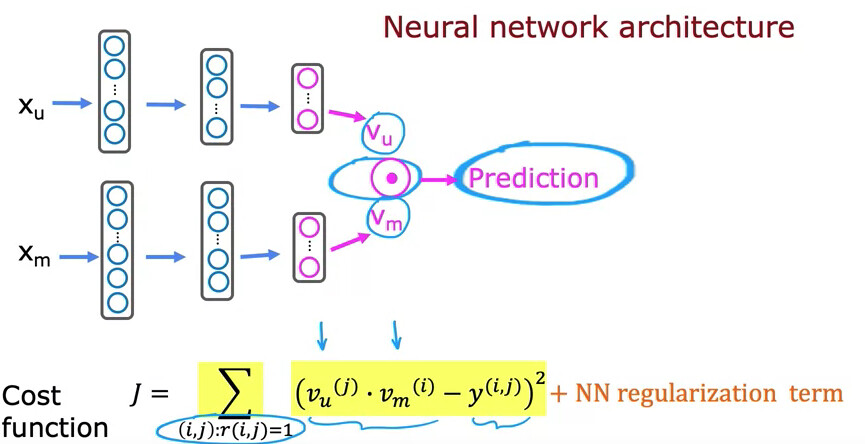

### 1. **User Neural Network**

We learn to map a user’s features to a dense vector (embedding):

$$
\mathbf{z}_u = \phi_{\text{user}}(\mathbf{x}_u)
$$

Where:
- $ \phi_{\text{user}} $ is a neural network (e.g., fully connected layers + ReLU)
- $ \mathbf{z}_u \in \mathbb{R}^d $ is the learned **representation** of the user

**Example implementation** (in PyTorch):

```python
UserNN = nn.Sequential(
    nn.Linear(p, 128),  # p = number of user features
    nn.ReLU(),
    nn.Linear(128, d)   # d = embedding dimension
)
```

### 2. **Item Neural Network**

Same idea for the item features:

$$
\mathbf{z}_i = \phi_{\text{item}}(\mathbf{x}_i)
$$

Where:
- $ \phi_{\text{item}} $ is another neural network
- $ \mathbf{z}_i \in \mathbb{R}^d $ is the item’s learned embedding

```python
ItemNN = nn.Sequential(
    nn.Linear(q, 128),  # q = number of item features
    nn.ReLU(),
    nn.Linear(128, d)
)
```

### 3. **Prediction Layer (Dot Product)**

Once we have both embeddings, we compute their **dot product**:

$$
\hat{r}_{ui} = \mathbf{z}_u^\top \mathbf{z}_i = \sum_{k=1}^d z_{u,k} \cdot z_{i,k}
$$

This gives a **similarity score** between user and item, with higher values indicating better matches.

In PyTorch:

```python
score = torch.sum(user_embedding * item_embedding, dim=1)
```


## 📉 **Loss Function (Training Objective)**

You train the model to minimize the error between the **true rating** $ r_{ui} $ and the **predicted rating** $ \hat{r}_{ui} $.

### Case 1: **Regression** (e.g., predict a rating from 1–5)

Use **Mean Squared Error** (MSE):

$$
\mathcal{L} = \frac{1}{N} \sum_{(u, i) \in D} (r_{ui} - \hat{r}_{ui})^2
$$

Where $ D $ is your dataset of known user-item interactions.

### Case 2: **Binary classification** (e.g., click / no click)

Use **Binary Cross Entropy**:

$$
\mathcal{L} = - \sum_{(u, i)} \left[ y_{ui} \log(\sigma(\hat{r}_{ui})) + (1 - y_{ui}) \log(1 - \sigma(\hat{r}_{ui})) \right]
$$

Where:
- $ y_{ui} \in \{0,1\} $ is the ground truth
- $ \sigma $ is the **sigmoid** function


### Example: Full PyTorch Implementation

```python
import torch
import torch.nn as nn

class ContentBasedModel(nn.Module):
    def __init__(self, user_dim, item_dim, embed_dim):
        super().__init__()
        self.user_net = nn.Sequential(
            nn.Linear(user_dim, 128),
            nn.ReLU(),
            nn.Linear(128, embed_dim)
        )
        self.item_net = nn.Sequential(
            nn.Linear(item_dim, 128),
            nn.ReLU(),
            nn.Linear(128, embed_dim)
        )

    def forward(self, user_features, item_features):
        user_embedding = self.user_net(user_features)  # [batch_size, d]
        item_embedding = self.item_net(item_features)  # [batch_size, d]
        return (user_embedding * item_embedding).sum(dim=1)  # Dot product
```

### Using users/items embeddings for similirities

Great question! Once you've trained a content-based filtering model and obtained **embeddings** for users and items (i.e., dense vector representations), you can use these embeddings to compute **similarities** and make recommendations.


#### What Are Embeddings?

- A **user embedding** $ \mathbf{z}_u \in \mathbb{R}^d $ captures the user's preferences.
- An **item embedding** $ \mathbf{z}_i \in \mathbb{R}^d $ encodes the characteristics of an item.
- These embeddings are learned during training so that their **dot product reflects preference** (e.g., high if the user likes the item).


#### How to Measure Similarity?

You can compute similarity between users or items using **vector similarity metrics**:

##### 1. **Dot Product**

$$
\text{score}_{ui} = \mathbf{z}_u^\top \mathbf{z}_i
$$

Used during training/prediction. High if the vectors are aligned.

##### 2. **Cosine Similarity** (to find similar users or similar items)

$$
\text{cos\_sim}(\mathbf{a}, \mathbf{b}) = \frac{\mathbf{a} \cdot \mathbf{b}}{\|\mathbf{a}\| \cdot \|\mathbf{b}\|}
$$

- Values range from –1 to 1.
- Commonly used to find:
  - **Similar items** to a given item
  - **Similar users** (e.g., for user-user collaborative filtering)


#### Examples of Use

##### 🔹 1. **Find Similar Items**

Given an item $ i $, compute:

$$
\text{cos\_sim}(\mathbf{z}_i, \mathbf{z}_{i'}) \quad \text{for all other items } i'
$$

You can then recommend items most similar to a given item (e.g., "users who liked this also liked...").

##### 🔹 2. **Find Similar Users**

Given a user $ u $, compute:

$$
\text{cos\_sim}(\mathbf{z}_u, \mathbf{z}_{u'}) \quad \text{for all other users } u'
$$

Used to find users with similar preferences — useful for hybrid or social-based systems.

##### 🔹 3. **Top-N Recommendations for a User**

Compute $ \hat{r}_{ui} = \mathbf{z}_u^\top \mathbf{z}_i $ for all items, and recommend the top N with the highest scores.

# Content based filtering with huge datasets: the retrieval and ranking method

When working with **huge datasets** (millions of users and items), a full dot-product comparison between all users and all items becomes computationally expensive. To address this, **Retrieval and Ranking** is a common two-stage approach used in **content-based** and **hybrid recommender systems**.


### 1. Retrieval and Ranking: Two-Stage Architecture

### **Stage 1: Retrieval**
- **Goal:** Efficiently retrieve a **small candidate set** of relevant items from a huge catalog (e.g., top 100).
- Examples:
    - for each of the last 10 movies watched by the user, find the 10 most similar movies
    - for most viewed 3 genres, find the top 10 movies
    - top 20 movies in the country
- Combine retrieved items in a list, remove duplicates or already purchased/watched items.

### **Stage 2: Ranking**
- **Goal:** Use a more **sophisticated model** to **re-score** and **rank** the candidates.
- Take the retrieved list of items and rank them using the learned model.
- Display ranked items to user.


### Why This Works

- **Retrieval** is fast and scalable; works on precomputed embeddings.
- **Ranking** allows for fine-grained decision-making with a smaller set.
- Helps maintain **real-time** performance with **high accuracy**.

# Building a deep learning content based filtering recommender system using PyTorch

Let's build from scratch the architecture we described earlier using PyTorch.

In [2]:
# Install dependencies as needed:
%pip install kagglehub==0.3.12
%pip install matplotlib
%pip install numpy
%pip install torch

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 25.0.1 -> 25.1
[notice] To update, run: python.exe -m pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 25.0.1 -> 25.1
[notice] To update, run: python.exe -m pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 25.0.1 -> 25.1
[notice] To update, run: python.exe -m pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 25.0.1 -> 25.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [3]:
#Import dependencies
import kagglehub
from kagglehub import KaggleDatasetAdapter
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
import torch
import torch.nn as nn

print(kagglehub.__version__)

0.3.12


In [4]:
class ContentBasedModel(nn.Module):
    def __init__(self, user_dim, item_dim, embed_dim):
        super().__init__()
        self.user_net = nn.Sequential(
            nn.Linear(user_dim, 256),
            nn.ReLU(),
            nn.Linear(256, 128),
            nn.ReLU(),
            nn.Linear(128, 32)
        )
        self.item_net = nn.Sequential(
            nn.Linear(user_dim, 256),
            nn.ReLU(),
            nn.Linear(256, 128),
            nn.ReLU(),
            nn.Linear(128, 32)
        )

    def forward(self, user_features, item_features):
        user_embedding = self.user_net(user_features)  # [batch_size, d]
        item_embedding = self.item_net(item_features)  # [batch_size, d]
        return (user_embedding * item_embedding).sum(dim=1)  # Dot product

In [5]:
def train(dataloader, model, loss_fn, optimizer):
    size = len(dataloader.dataset)
    model.train()
    for batch, (X, y) in enumerate(dataloader):
        X, y = X.to(device), y.to(device)

        # Compute prediction error
        pred = model(X)
        loss = loss_fn(pred, y)

        # Backpropagation
        loss.backward()
        optimizer.step()
        optimizer.zero_grad()

        if batch % 100 == 0:
            loss, current = loss.item(), (batch + 1) * len(X)
            print(f"loss: {loss:>7f}  [{current:>5d}/{size:>5d}]")

In [6]:
def test(dataloader, model, loss_fn):
    size = len(dataloader.dataset)
    num_batches = len(dataloader)
    model.eval()
    test_loss, correct = 0, 0
    with torch.no_grad():
        for X, y in dataloader:
            X, y = X.to(device), y.to(device)
            pred = model(X)
            test_loss += loss_fn(pred, y).item()
            correct += (pred.argmax(1) == y).type(torch.float).sum().item()
    test_loss /= num_batches
    correct /= size
    print(f"Test Error: \n Accuracy: {(100*correct):>0.1f}%, Avg loss: {test_loss:>8f} \n")

In [7]:
path = kagglehub.dataset_download("arashnic/book-recommendation-dataset")

print("Path to dataset files:", path)

Path to dataset files: C:\Users\Arthur\.cache\kagglehub\datasets\arashnic\book-recommendation-dataset\versions\3


In [15]:
file_path = "Books.csv"
file_path = os.path.join(path, file_path)

# Load the latest version
books_df = pd.read_csv(file_path).dropna()
books_df = books_df.drop(['ISBN', 'Image-URL-S', 'Image-URL-M', 'Image-URL-L'], axis=1)

print(books_df.columns)

print(books_df.dtypes)

books_df = books_df[books_df['Year-Of-Publication'] != 0] 

print("Books", books_df)

C:\Users\Arthur\AppData\Local\Temp\ipykernel_6288\1595273103.py:5: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  books_df = pd.read_csv(file_path).dropna()


Index(['Book-Title', 'Book-Author', 'Year-Of-Publication', 'Publisher'], dtype='object')
Book-Title             object
Book-Author            object
Year-Of-Publication    object
Publisher              object
dtype: object
Books                                                Book-Title  \
0                                     Classical Mythology   
1                                            Clara Callan   
2                                    Decision in Normandy   
3       Flu: The Story of the Great Influenza Pandemic...   
4                                  The Mummies of Urumchi   
...                                                   ...   
271355                         There's a Bat in Bunk Five   
271356                            From One to One Hundred   
271357  Lily Dale : The True Story of the Town that Ta...   
271358                        Republic (World's Classics)   
271359  A Guided Tour of Rene Descartes' Meditations o...   

                 Book-Author Year-Of-P

In [ ]:
file_path = "Users.csv"

# Load the latest version
users_df = kagglehub.load_dataset(
  KaggleDatasetAdapter.PANDAS,
  "arashnic/book-recommendation-dataset",
  file_path
)

print("Users", userss_df)

In [ ]:
file_path = "Ratings.csv"

# Load the latest version
ratings_df = kagglehub.load_dataset(
  KaggleDatasetAdapter.PANDAS,
  "arashnic/book-recommendation-dataset",
  file_path
)

print("Ratings", ratings_df)

In [ ]:
batch_size = 64

# Create data loaders.
train_dataloader = DataLoader(training_data, batch_size=batch_size)
test_dataloader = DataLoader(test_data, batch_size=batch_size)

for X, y in test_dataloader:
    print(f"Shape of X [N, C, H, W]: {X.shape}")
    print(f"Shape of y: {y.shape} {y.dtype}")
    break

In [ ]:
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(), lr=1e-3)

In [ ]:
epochs = 20
for t in range(epochs):
    print(f"Epoch {t+1}\n-------------------------------")
    train(train_dataloader, model, loss_fn, optimizer)
    test(test_dataloader, model, loss_fn)
print("Done!")